HW_4_6&7 by 22000690 정이주

1. Objective : This code is for Project data onto PCA planes and Visualize 2-dim MNIST data.

2. Input

  * Data image file (mnist.pkl)

3. Output

  * 3 head data of train data
  * New data points shape
  * Shape of projecte_x and train_y 

In [7]:
import pickle
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [9]:
# Load MNIST data
with open('mnist.pkl', 'rb') as f:
    train_set, valid_set, test_set = pickle.load(f, encoding = 'latin1')

train_x, train_y = train_set
test_x, test_y = test_set

# Make dataframe with pandas
train_x = pd.DataFrame(train_x)
train_y = pd.DataFrame(train_y)
test_x = pd.DataFrame(test_x)
test_y = pd.DataFrame(test_y)

# Multiple identical dataframe combinations
train_data = pd.concat([train_x, train_y], axis  = 1)

# Dimension reduction scratch
train_x = train_data.iloc[:,:-1]
train_y = train_data.iloc[:,-1]

# Calculate covariance matrix, eigen values and eigen vectors
cov_matrix = np.cov(train_x.T)
eig_val, eig_vec = np.linalg.eig(cov_matrix.real)
eig_vec = eig_vec.T

In [10]:
# Check the original array
train_data.head(3)

,0,1,2,3,4,5,6,7,8,9,...,775,776,777,778,779,780,781,782,783,0
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4


In [11]:
# Projected data onto PCA planes
projected_x = train_x.dot(eig_vec[0:2].T).to_numpy()
print("new data points shape: ", train_x.shape, "X", eig_vec[0:2].T.shape, "=", projected_x.shape)
print("projected_x.shape: ", projected_x.shape, " train_y.shape: ", train_y.shape)

new data points shape:  (50000, 784) X (784, 2) = (50000, 2)
projected_x.shape:  (50000, 2)  train_y.shape:  (50000,)


In [12]:
# Check the projected array
new_coordinates = np.vstack((projected_x.T, train_y)).T
dataframe = pd.DataFrame(new_coordinates.real, columns = ['1st_pca','2nd_pca','label'])
dataframe.head(3)

,1st_pca,2nd_pca,label
0,3.466855,-1.348822,5.0
1,6.926997,-1.353609,0.0
2,2.801635,1.445926,4.0


Text(0, 0.5, 'Principal Component 2')

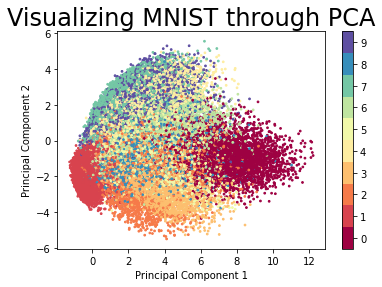

In [13]:
# Create scatterplots with table data(projected_x)
plt.scatter(projected_x[:, 0].real, projected_x[:, 1].real, s=3,c=train_y, cmap='Spectral')
plt.colorbar(boundaries=np.arange(11)-0.5).set_ticks(np.arange(10))

plt.title('Visualizing MNIST through PCA', fontsize=24);
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')